### Set up environment

In [1]:
import lateral_signaling as lsig
import numpy as np
import pandas as pd
from tqdm import tqdm
import numba

import scipy.stats as st
from scipy.spatial import Voronoi
from scipy.sparse import csr_matrix

import colorcet as cc

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib_scalebar.scalebar import ScaleBar


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
import os

In [3]:
%load_ext blackcellmagic
%matplotlib inline

__Define RHS function(s)__

In [4]:
def signal_rhs(S, S_delay, Adj, sender_idx, beta_func, beta_args, alpha, k, p, delta, lambda_, g, rho):
    """
    Right-hand side of the transciever circuit delay 
    differential equation. Uses a matrix of normalized 
    cell-cell contact lengths `Adj`.
    """

    # Get signaling as a function of density
    beta = beta_func(rho, *beta_args)
    
    # Get input signal across each interface
    S_bar = beta * (Adj @ S_delay)

    # Calculate dE/dt
    dS_dt = (
        lambda_
        + alpha
        * (S_bar ** p)
        / (
            k ** p 
            + (delta * S_delay) ** p 
            + S_bar ** p
        )
        - S
    )

    # Set sender cell to zero
    dS_dt[sender_idx] = 0

    return dS_dt

<hr>

## Generate all figures for a trial set of parameters 

In [5]:
# Set parameters to save figures
save_figs = False
save_dir = 'C:\\Users\\Pranav\\git\\evomorph\\lateral_signaling\\plots'
dpi = 180
fig_fmt = "png"
vid_fmt = "mp4"

# Set directory
dir_name = "plots"

In [6]:
# Set  name of trial
trial_name = "lowcis_expbeta"

# Set seed for RNG
seed = 2021

__Set interaction radius__

In [7]:
# Interaction radius in cell-lengths 
r_int = 3.05

<hr>

## Fetch parameters

In [8]:
# Read trial parameters from CSV
params_df = pd.read_csv("parameters_" + trial_name + ".csv")
params_df

trial_name     parameter    value
0  lowcis_expbeta         alpha  3.00000
1  lowcis_expbeta             k  0.02000
2  lowcis_expbeta             p  2.00000
3  lowcis_expbeta         delta  1.00000
4  lowcis_expbeta       lambda_  0.00001
5  lowcis_expbeta             g  1.00000
6  lowcis_expbeta  beta_param_0  1.00000
7  lowcis_expbeta         delay  0.30000

In [9]:
# Get any arguments for beta function
is_beta_arg = [p.startswith("beta_") for p in params_df["parameter"].values]
beta_args   = params_df.value.values[is_beta_arg]

# Get the delay parameter
is_delay    = [p == "delay" for p in params_df["parameter"].values]
delay       = params_df.value.values[is_delay][0]

# Package all other parameters 
is_param    = [not (ba or d) for ba, d in zip(is_beta_arg, is_delay)]
param_names = params_df.parameter.values[is_param]
param_vals  = params_df.value.values[is_param]

# Package arguments for lsig.integrate_DDE and 
#   lsig.integrate_DDE_varargs. Density param is 
#   initialized with rho = 1.
dde_args = *param_vals, 1.

In [10]:
# Get `k`
where_k = next(i for i, pn in enumerate(param_names) if "k" == pn)
k = param_vals[where_k]
thresh = k

# Get `g`
where_g = next(i for i, pn in enumerate(param_names) if "g" == pn)
g = param_vals[where_g]

<hr>

__Set time parameters__

In [11]:
# Set time parameters in dimensionless units
tmax = 3
nt_t = 500
nt = int(nt_t * tmax) + 1

t = np.linspace(0, tmax, nt)

__Construct lattice of cells__

In [12]:
# Make square lattice
rows = cols = 50
X = lsig.hex_grid(rows, cols)

# Get # cells
n = X.shape[0]

__Get cell adjacency__

In [13]:
# Get adjacency and normalize
gAdj = lsig.gaussian_irad_Adj(X, r_int, sparse=True, row_stoch=True)

__Set sender cell location__

In [14]:
# Set sender cell
sender_idx = lsig.get_center_cells(X)

__Set initial expression__

In [15]:
# Use basal promoter activity as mean of distribution
lambda_ = dde_args[4]

# Seed random initial expression
## Values are drawn from a HalfNormal distribution with mean `lambda`
S0 = st.halfnorm.rvs(
    size=n, 
    scale=lambda_ * np.sqrt(np.pi/2), 
    random_state=seed,
).astype(np.float32)

# Fix sender cell(s) to expression of 1
S0[sender_idx] = 1

__Get RHS of signaling DDE__

In [16]:
# Get RHS of DDE equation to pass to integrator
rhs = lsig.get_DDE_rhs(signal_rhs, gAdj, sender_idx, lsig.beta_rho_exp, beta_args,)

# Propagation for different values of $\beta$

In [17]:
ref_density =  1250  # cells / mm^2
ref_density /= 1e6   # cells / um^2
cell_diam = np.sqrt(
    2 / (np.sqrt(3) * ref_density)
)

# Optional: specify values to use in scalebar
scalebar_vals = [125, 100, 75]

print(f"Cell diameter at reference density: {cell_diam:.2f} μm")

Cell diameter at reference density: 30.39 μm


In [18]:
rhos = np.array([1, 2, 4])

args_rho_1 = (*dde_args[:4], 1e-5, 1, rhos[0])
args_rho_2 = (*dde_args[:4], 1e-5, 1, rhos[1])
args_rho_4 = (*dde_args[:4], 1e-5, 1, rhos[2])

cr = np.ones(n) * 2

tf_nondim = lambda i: f"simulation time: {t[i]:.1f} "

In [19]:
S1, S2, S4 = [
    lsig.integrate_DDE(
        t,
        rhs,
        dde_args=args,
        E0=S0,
        delay=delay,
        progress_bar=False,
    )
    for args in (args_rho_1, args_rho_2, args_rho_4)
]

res = np.array([S1, S2, S4])

In [20]:
X_rho = [
    X / np.sqrt(rho)
    for rho in rhos
]

In [21]:
# Get field of view boundaries
xlim, ylim = np.array([X.min(axis=0), X.max(axis=0)]).T / np.sqrt(max(rhos))

# Center on sender cell
xlim[1] = X[sender_idx, 0] + (X[sender_idx, 0] - xlim[0])
ylim[1] = X[sender_idx, 1] + (X[sender_idx, 1] - ylim[0])

# Format as tuples (immutable)
xlim, ylim = tuple(xlim), tuple(ylim)

# Set limits on fluorescence colorscale
vmin,  vmax  = 0, 0.3

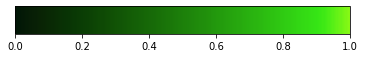

In [22]:
kgy_big = cc.cm["kgy"]
new_kgy = ListedColormap(kgy_big(np.linspace(0, 0.92, 256)))

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

fig.colorbar(
    mpl.cm.ScalarMappable(cmap=new_kgy),
    cax=ax, orientation='horizontal'
)

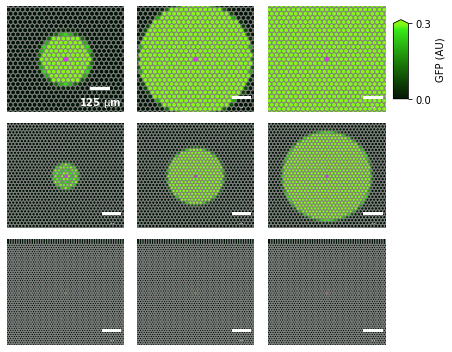

In [24]:
rows, cols = 3, 3

# Plot single frames
fig, axs = plt.subplots(
    rows, 
    cols, 
    figsize=(6.5, 5),
    gridspec_kw=dict(width_ratios=[1, 1, 1.2]),
)

for i in range(rows * cols):
    
    row = i % rows
    col = i // rows
    ax = axs[row][col]
    
    # Sample 3 time-points
    frame = nt_t * (1 + col)
    
    # Set title
    if row == 0:
#         title = f"Day {lsig.t_to_units(t[frame]):.0f}"
        title = ""
        cbar_kwargs = dict(ticks=[0.0, 0.3], label="GFP (AU)")
    else:
        title = ""
        cbar_kwargs = dict(ticks=[], label="", alpha=0)
    
    lsig.inspect_hex(
        ax=ax,
        X=X_rho[row],
        idx=frame,
        var_t=res[row],
        vmin=vmin,
        vmax=vmax,
        cmap=lsig.kgy,
        sender_idx=sender_idx,
        sender_clr=("bmw", 150),
        title=title,
        colorbar=False,
        cbar_aspect=8,
        xlim=xlim,
        ylim=ylim,
    )
    
    if col == 2:
        # Plot colorbars in last column
        cbar = plt.colorbar(
            plt.cm.ScalarMappable(
                norm=mpl.colors.Normalize(vmin, vmax), 
                cmap=lsig.kgy,
            ), 
            ax=ax,
            aspect=5,
            extend="max",
            shrink=0.75,
            **cbar_kwargs
        )
        
        # Make colorbar invisible in 2nd and 3rd rows
        if row > 0:
            fig.axes[-1].artists[0].set_edgecolor((0,0,0,0))

    
    # Hide text except first 
    font_size = (i == 0) * 10    
    
    # Make scalebar
    scalebar = ScaleBar(
        cell_diam,   # cell diameter in um
        units="um", 
#         fixed_value=scalebar_vals[run],
        color="w", 
        box_color="w", 
        box_alpha=0, 
        font_properties=dict(weight=1000, size=font_size), 
        width_fraction=0.03,
        location="lower right"
    )

    ax.add_artist(scalebar);

plt.tight_layout()

if save_figs:
    fig_fname = f"propagation_constant_density_rho_1-4X_short"
    fig_path = os.path.join(save_dir, fig_fname + "." + fig_fmt)
    fig.savefig(fig_path, dpi=dpi, format=fig_fmt,)

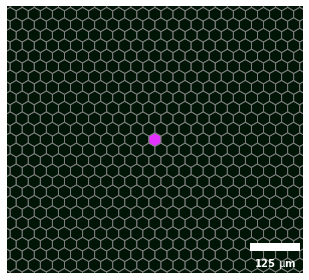

In [25]:
# Plot expression at Day 0
frame = 0

fig, ax = plt.subplots(1)
# title = f"Day {lsig.t_to_units(t[frame]):.0f}"
title = ""
lsig.inspect_hex(
    ax=ax,
    X=X_rho[0],
    idx=0,
    var_t=res[0],
    vmin=vmin,
    vmax=vmax,
    cmap=new_kgy,
    sender_idx=sender_idx,
    sender_clr=("bmw", 150),
    title=title,
    colorbar=False,
    cbar_aspect=8,
    xlim=xlim,
    ylim=ylim,
)

# Make scalebar
scalebar = ScaleBar(
    cell_diam,   # cell diameter in um
    units="um", 
#         fixed_value=scalebar_vals[run],
    color="w", 
    box_color="w", 
    box_alpha=0, 
    font_properties=dict(weight=1000, size=10), 
    width_fraction=0.03,
    location="lower right"
)
ax.add_artist(scalebar);

plt.tight_layout()

if save_figs:
    fig_fname = f"GFP_initial_condition_rho_1_time0"
    fig_path = os.path.join(save_dir, fig_fname + "." + fig_fmt)
    fig.savefig(fig_path, dpi=dpi, format=fig_fmt,)

<hr>

### Save videos

In [26]:
vid_fname = [f"propagation_constant_density_{int(i)}X" for i in rhos]
vid_path = [os.path.join(save_dir, f + "." + vid_fmt) for f in vid_fname]

tf = lambda i: f"Simulation time: {t[i]:.2f}"

sbar_kwargs = dict(
    units="um", 
    color="w", 
    box_color="w", 
    box_alpha=0, 
    font_properties=dict(weight=1000, size=10), 
    width_fraction=0.03,
    location="lower right"
)


In [27]:
if save_figs:

    run = 0

    lsig.animate_var_lattice_scalebar(
        X_rho[run],
        var_t=res[run],
        n_frames=100,
        path=vid_path[run],
        xlim=xlim,
        ylim=ylim,
        fps=15,
        vmin=vmin,
        vmax=vmax,
        cmap=new_kgy,
        title_fun=tf,
        plot_ifc=False,
        colorbar=True,
        cbar_aspect=8,
        cbar_kwargs=dict(ticks=[vmin, vmax], label="GFP (AU)"),
        scalebar=True,
        scale_factor=scale_factor,
        sbar_opts=sbar_kwargs,
    )

In [28]:
if save_figs:

    run = 1

    lsig.animate_var_lattice_scalebar(
        X_rho[run],
        var_t=res[run],
        n_frames=100,
        path=vid_path[run],
        xlim=xlim,
        ylim=ylim,
        fps=15,
        vmin=vmin,
        vmax=vmax,
        cmap=new_kgy,
        title_fun=tf,
        plot_ifc=False,
        colorbar=True,
        cbar_aspect=8,
        cbar_kwargs=dict(ticks=[vmin, vmax], label="GFP (AU)"),
        scalebar=True,
        scale_factor=scale_factor,
        sbar_opts=sbar_kwargs,
    )

In [29]:
if save_figs:

    run = 2

    lsig.animate_var_lattice_scalebar(
        X_rho[run],
        var_t=res[run],
        n_frames=100,
        path=vid_path[run],
        xlim=xlim,
        ylim=ylim,
        fps=15,
        vmin=vmin,
        vmax=vmax,
        cmap=new_kgy,
        title_fun=tf,
        plot_ifc=False,
        colorbar=True,
        cbar_aspect=8,
        cbar_kwargs=dict(ticks=[vmin, vmax], label="GFP (AU)"),
        scalebar=True,
        scale_factor=scale_factor,
        sbar_opts=sbar_kwargs,
    )

<hr>

In [30]:
import holoviews as hv
hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Plot time-series of GFP expression

In [31]:
# Calculate the number of activated transceivers
n_act_t = (res > k).sum(axis=2) - sender_idx.size

# Percent of activated transceivers
pct_act_t = n_act_t / n * 100

# Optionally normalize percentage
pct_act_t = lsig.normalize(pct_act_t, 0, pct_act_t.max()) * 100

# Area of activation
rho_t = np.ones_like(n_act_t) * rhos.reshape([3,1])
A_t = lsig.ncells_to_area(n_act_t, rho_t)

A_t_norm = lsig.normalize(A_t, 0, A_t.max())

In [32]:
# # Area of field of view
# fov_area = (xlim[1] - xlim[0]) * (ylim[1] - ylim[0])
# fov_area = fov_area * (scale_factor ** 2)  # um^2

In [33]:
# Make color cycle
cycle = lsig.sample_cycle(cc.gray[:200], 3)

In [34]:
# Make data
data = {
    "t"   : np.tile(t, len(rhos)),
    "A_t_norm" : A_t_norm.ravel(),
    r"density (x 100% confl.)": np.repeat([f"{int(r)}X" for r in rhos], nt),
}

# xticks = [(0, "0"), (delay, "τ")] + [(tick, str(i) + "τ") for i, tickin enumerate(np.arange(0, tmax, delay)) if i>1]
xticks = [(0, "0"), (delay, "τ"), (2 * delay, "2τ"), (3 * delay, "⋯"), (4 * delay, ""), (5 * delay, ""), (6 * delay, ""), (7 * delay, "")]

# Plot
plot = hv.Curve(
    data,
    kdims=["t"],
    vdims=["A_t_norm", r"density (x 100% confl.)"],
).groupby(
    r"density (x 100% confl.)",
).opts(
    xlabel="simulation time",
    ylabel=r"activated area (norm.)",
    xlim=(-0.15, tmax + 0.15),
    xticks=xticks,
    ylim=(-0.05, 1.05),
    yticks=[0.0, 0.5, 1.0],
    linewidth=4,
    color=hv.Cycle(lsig.cols_blue),
).overlay(
).opts(
    legend_position="top_left",
    fontscale=1.3,
)

:NdOverlay   [density (x 100% confl.)]
   :Curve   [t]   (A_t_norm,density (x 100% confl.))
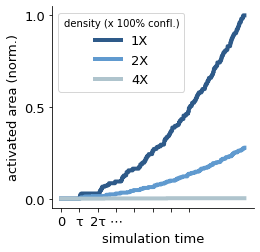

In [35]:
plot

In [173]:
# Save 
if save_figs:
    plot_fname = f"GFP_constant_density_areaplot_rho_1-4X_short"
    plot_path = os.path.join(save_dir, plot_fname + "." + fig_fmt)
    hv.save(plot, plot_path, dpi=dpi, fmt=fig_fmt)

<hr>